In [117]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from itertools import product

%matplotlib inline



In [2]:
# general setup

# agent must move to match self position and target position

# rewards are -1 for every time point

In [101]:
# Q LEARNING

ALPHA = .5 # update wait
EPSILON=0.3 # epsilon - greedy exploration
EPISODES = 10000 # num training episodes
NPIXELX,NPIXELY = 10,10 # 




In [102]:
# define agent class
class hand():
    def __init__(self, npixely, npixelx):
        self.hand_pos = [0,0]
        self.targ_pos = [None,None]
        self.npixelx = npixelx
        self.npixely = npixely
        self.wind = False
        self.wind_vec=[0,0]
        self._init_qfunc()
        
        self.actions = [[-1,0],
                       [1,0],
                       [0,-1],
                       [0,1],
                       [-1,-1],
                       [1,-1],
                       [-1,1],
                       [1,1]]
        
    def _init_qfunc(self):
        self.Q = {}
        for hposy in range(self.npixelx):
            for hposx in range(self.npixely):
                self.Q[(hposy,hposx)]= np.random.randn(8)
                
#                 for tposy in range(self.npixelx):
#                     for tposx in range(self.npixely):
#                         self.Q[(hposy,hposx)][(tposy,tposx)]= np.random.randn(8)
                        
    def init_hand_pos(self,y,x):
        self.hand_pos = [y,x]
    def update_hand_pos(self,dy,dx):
        self.hand_pos=[np.minimum(np.maximum(self.hand_pos[0]+dy,0),self.npixely-1),np.minimum(np.maximum(self.hand_pos[1]+dx,0),self.npixelx-1)]
        
    def init_targ_pos(self,y,x):
        self.targ_pos=[y,x]
                                
   
    def get_Q(self,hpos):
        return self.Q[tuple(hpos)]

    
    
                        



In [103]:
# init agent
h = hand(NPIXELY,NPIXELX)

# init Q function np.random.randn(gridpos_agent x gridpos_target x # of actions available) or as dictionary with [state][action] keys


In [105]:
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES):

    # init state
    h.init_hand_pos(np.random.randint(NPIXELY),np.random.randint(NPIXELX))
    h.init_targ_pos(8,5)

    #     define terminal state
    if ep%1000 ==0:
        print('episode',ep,counter)

    counter = 0
    while h.hand_pos != h.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h.get_Q(h.hand_pos))

    
    #         print('a',ay,ax)
        h_old = h.hand_pos[:]
        action = h.actions[a]
        h.update_hand_pos(action[0],action[1])
        
        
        if h.hand_pos != h.targ_pos:
            reward = -1
#             reward = -(h.hand_pos)
        else:
            reward = 0
        rewards.append(reward)
        h.Q[tuple(h_old)][a] += ALPHA*(reward + np.amax(h.get_Q(h.hand_pos)) - h.get_Q(h_old)[a])

        counter+=1
    COUNTERS.append(counter)

    

episode 0 0
episode 1000 17
episode 2000 5
episode 3000 12
episode 4000 11
episode 5000 3
episode 6000 1
episode 7000 4
episode 8000 8
episode 9000 10


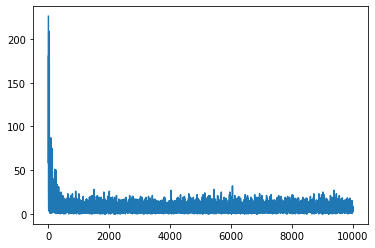

In [106]:
f,ax = plt.subplots()
# print(rewards)
ax.plot(COUNTERS[:])

In [107]:
hand_pos = []
for it in range(20):
    hand_pos.append([]) 
    h.init_hand_pos(np.random.randint(NPIXELY),np.random.randint(NPIXELX))
    hand_pos[-1].append([*h.hand_pos])

    while h.hand_pos != h.targ_pos:
        # choose action using Q[state] epsilon greedy
        a = np.argmax(h.get_Q(h.hand_pos))
    #     print(h.hand_pos)
        h.update_hand_pos(*h.actions[a])
        counter+=1
        hand_pos[-1].append([*h.hand_pos])

odict_keys(['left', 'right', 'bottom', 'top'])


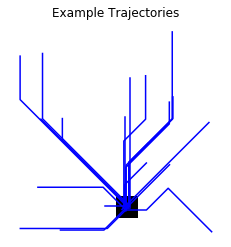

In [108]:
f,ax = plt.subplots()
im = np.zeros((NPIXELY,NPIXELX))
im[h.targ_pos[0],h.targ_pos[1]] = 1
ax.imshow(im,cmap='Greys')

# V  = np.zeros((NPIXELY,NPIXELX))
# for r in range(NPIXELY):
#     for c in range(NPIXELX):
#         V[r,c] = h.get_Q([r,c]).sum()
# ax.imshow(V,cmap='viridis')
# ax.scatter([h.targ_pos[1]],[h.targ_pos[0]],color='red',s=1000)
        
for it in range(len(hand_pos)):
    
    _hpos = np.array(hand_pos[it])
    _hpos = _hpos+.1*np.random.randn(1,2)
    ax.plot(_hpos[:,1],_hpos[:,0],color='blue')
    
ax.set_xticks([])
ax.set_yticks([])
print(ax.spines.keys())
for k in ax.spines:
    ax.spines[k].set_visible(False)
ax.set_title("Example Trajectories")
f.savefig("tabularQLearningTrajectories.pdf",format='pdf')
# ax.spines['top'].set_visible(False)

# ax.plot(hand_pos[:,0],hand_pos[:,1])

In [109]:
h_wind = hand(NPIXELY,NPIXELX)
rewards = []
counter = 0
COUNTERS = []


for ep in range(EPISODES*10):

    # init state
    h_wind.init_hand_pos(np.random.randint(NPIXELY),np.random.randint(NPIXELX))
    h_wind.init_targ_pos(8,5)

    #     define terminal state
    if ep%1000 ==0:
        print('episode',ep,counter)

    counter = 0
    while h_wind.hand_pos != h_wind.targ_pos:

        # choose action using Q[state] epsilon greedy
        if np.random.rand()<EPSILON:
            a = np.random.randint(8)
        else:
            a= np.argmax(h_wind.get_Q(h_wind.hand_pos))

    
    #         print('a',ay,ax)
        h_old = h_wind.hand_pos[:]
        action = h_wind.actions[a][:]
        
        # add wind - blows up between 3 and 5
        if (h_wind.hand_pos[0]>=2) and (h_wind.hand_pos[0]<=6):
            action[1]-=1
#             print(action)
        
        
        h_wind.update_hand_pos(action[0],action[1])
        
#         print(h_old,h_wind.hand_pos,action)
        if h_wind.hand_pos != h_wind.targ_pos:
            reward = -1
        else:
            reward = 0
        rewards.append(reward)
        h_wind.Q[tuple(h_old)][a] += ALPHA*(reward + np.amax(h_wind.get_Q(h_wind.hand_pos)) - h_wind.get_Q(h_old)[a])

        counter+=1
    COUNTERS.append(counter)

episode 0 0
episode 1000 3
episode 2000 16
episode 3000 3
episode 4000 6
episode 5000 9
episode 6000 3
episode 7000 6
episode 8000 2
episode 9000 3
episode 10000 2
episode 11000 20
episode 12000 4
episode 13000 3
episode 14000 3
episode 15000 4
episode 16000 4
episode 17000 15
episode 18000 0
episode 19000 17
episode 20000 11
episode 21000 8
episode 22000 6
episode 23000 9
episode 24000 2
episode 25000 7
episode 26000 2
episode 27000 8
episode 28000 6
episode 29000 10
episode 30000 4
episode 31000 5
episode 32000 5
episode 33000 23
episode 34000 23
episode 35000 5
episode 36000 15
episode 37000 1
episode 38000 5
episode 39000 20
episode 40000 5
episode 41000 19
episode 42000 3
episode 43000 3
episode 44000 17
episode 45000 3
episode 46000 6
episode 47000 4
episode 48000 6
episode 49000 7
episode 50000 4
episode 51000 5
episode 52000 2
episode 53000 11
episode 54000 10
episode 55000 4
episode 56000 6
episode 57000 23
episode 58000 15
episode 59000 6
episode 60000 7
episode 61000 7
episo

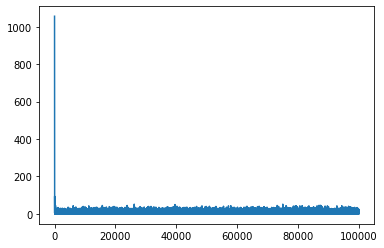

In [110]:
f,ax = plt.subplots()
ax.plot(COUNTERS)

In [115]:
hand_pos = []
for it in range(20):
    hand_pos.append([]) 
    h_wind.init_hand_pos(np.random.randint(NPIXELY),np.random.randint(NPIXELX))
    hand_pos[-1].append([*h_wind.hand_pos])

    while h_wind.hand_pos != h.targ_pos:
        # choose action using Q[state] epsilon greedy
        a = np.argmax(h_wind.get_Q(h_wind.hand_pos))
    #     print(h.hand_pos)
        h_wind.update_hand_pos(*h_wind.actions[a])
        counter+=1
        hand_pos[-1].append([*h_wind.hand_pos])

odict_keys(['left', 'right', 'bottom', 'top'])


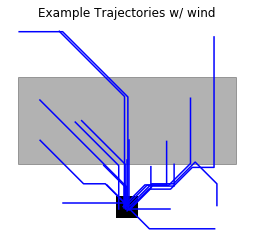

In [116]:
f,ax = plt.subplots()
im = np.zeros((NPIXELY,NPIXELX))
im[h_wind.targ_pos[0],h_wind.targ_pos[1]] = 1
ax.imshow(im,cmap='Greys')

ax.fill_between([0,10],[2,2],[6,6],color='black',alpha=.3)
for it in range(len(hand_pos)):
    
    _hpos = np.array(hand_pos[it])
    _hpos = _hpos+.1*np.random.randn(1,2)
    ax.plot(_hpos[:,1],_hpos[:,0],color='blue')

    
ax.set_xticks([])
ax.set_yticks([])
print(ax.spines.keys())
for k in ax.spines:
    ax.spines[k].set_visible(False)
ax.set_title("Example Trajectories w/ wind")
f.savefig("tabularQLearningTrajectories_wind.pdf",format='pdf')